My code along with https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

# Neural Networks

## Data

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(
            (0.5, 0.5, 0.5),
            (0.5, 0.5, 0.5),
        ),
    ]
)

batch_size = 100

trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True,
    download=True,
    transform=transform,
)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2,
)


testset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=False,
    download=True,
    transform=transform,
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2,
)

classes = (
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck',
)

Files already downloaded and verified
Files already downloaded and verified


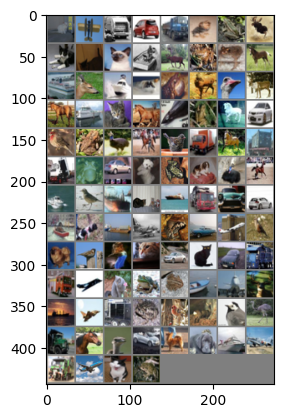

cat   plane truck car   truck dog   frog  deer  cat   cat   cat   ship  deer  frog  frog  horse ship  deer  ship  dog   frog  deer  bird  deer  horse ship  cat   horse plane frog  horse car   bird  frog  bird  horse bird  truck horse truck truck frog  car   dog   frog  dog   bird  horse ship  bird  ship  cat   ship  truck car   car   ship  dog   ship  plane frog  car   plane bird  dog   bird  bird  cat   car   cat   car   truck truck plane cat   frog  frog  ship  plane deer  ship  plane truck frog  bird  deer  bird  bird  truck horse bird  car   dog   dog   ship  plane truck plane cat   frog 


In [3]:
# Have a look at some images

import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
print(
    ' '.join(
        f'{classes[label]:5s}' 
        for label in labels
    )
)


# Define a Convolutional Neural Network

In [4]:
import torch.nn as nn
import torch.nn.functional as F

In [83]:
class Net(nn.Module):
    def __init__(self, width=6):
        super().__init__()
        self.conv1 = nn.Conv2d(3, width, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(width, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, len(classes))

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Define a Loss function and Optimiser

# Train the Network

In [6]:
for i in range(torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))
    print(torch.cuda.get_device_properties(i))

AMD Radeon RX 6800
_CudaDeviceProperties(name='AMD Radeon RX 6800', major=10, minor=3, total_memory=16368MB, multi_processor_count=30)
AMD Radeon RX 6800
_CudaDeviceProperties(name='AMD Radeon RX 6800', major=10, minor=3, total_memory=16368MB, multi_processor_count=30)


In [7]:
import torch.optim as optim

device = "cuda:1" if torch.cuda.is_available() else "cpu"

net = Net()

net = net.to(device)

optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
criterion = nn.CrossEntropyLoss()

for epoch in range(10):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        labels = labels.to(device)
        inputs = inputs.to(device)
        
        # forward
        outputs = net(inputs)
        # calculate loss
        loss = criterion(outputs, labels)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        # backward pass
        loss.backward()
        # learn :)
        optimizer.step()
        
        # print stats
        running_loss += loss.item()
    print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / (i+1):.3f}')

[1,   500] loss: 1.773
[2,   500] loss: 1.570
[3,   500] loss: 1.532
[4,   500] loss: 1.497
[5,   500] loss: 1.488
[6,   500] loss: 1.471
[7,   500] loss: 1.477
[8,   500] loss: 1.495
[9,   500] loss: 1.525
[10,   500] loss: 1.521


In [8]:
import torch.optim as optim

device = "cuda:1" if torch.cuda.is_available() else "cpu"

net = Net()

net = net.to(device)

optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
criterion = nn.CrossEntropyLoss()

for epoch in range(10):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        labels = labels.to(device)
        inputs = inputs.to(device)
        
        
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward
        outputs = net(inputs)
        # calculate loss
        loss = criterion(outputs, labels)
        # backward pass
        loss.backward()
        # learn :)
        optimizer.step()
        
        # print stats
        running_loss += loss.item()
    print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / (i+1):.3f}')

[1,   500] loss: 1.799
[2,   500] loss: 1.610
[3,   500] loss: 1.582
[4,   500] loss: 1.559
[5,   500] loss: 1.547
[6,   500] loss: 1.539
[7,   500] loss: 1.535
[8,   500] loss: 1.539
[9,   500] loss: 1.558
[10,   500] loss: 1.543


In [9]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [10]:
data_iter = iter(testloader)
images, labels = next(dataiter)

plane


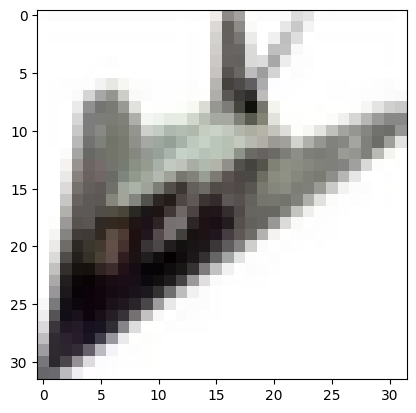

In [32]:
index = 4
img = images[index]

    # img = img / 2 + 0.5
    # npimg = img.numpy()
    # plt.imshow(np.transpose(npimg, (1,2,0)))
    # plt.show()
img.size()
img = img / 2 + 0.5
np_img = img.numpy()
display(plt.imshow(np.transpose(np_img, (1, 2, 0))))
print(classes[labels[index]])

In [26]:
classes[labels[index]]

'deer'

In [34]:
g = torchvision.utils.make_grid(images)

In [35]:
g.size()

torch.Size([3, 444, 274])

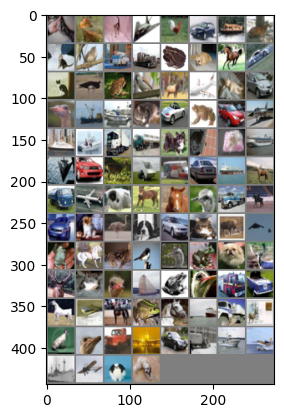

GroundTruth:  cat   deer  cat   plane


In [36]:
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))


In [37]:
PATH

'./cifar_net.pth'

In [39]:
# Reload model, just to learn how
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [42]:
outputs = net(images)

In [46]:
_a, predicted = torch.max(outputs, 1)

In [47]:
_a

tensor([ 5.8196,  0.7713,  3.0276,  2.8987,  3.3095,  0.5831,  5.3227,  1.3862,
         2.9019,  2.8029,  2.4653,  3.5279,  2.7302,  5.3814,  1.6066,  1.9419,
         4.4469,  4.8898, 11.2021,  1.2786,  1.4127,  6.9992,  4.2403, 11.4662,
         1.2861,  3.0862,  8.8626,  3.9078,  9.8721,  2.1549, 14.8085,  1.2567,
        11.0563,  1.3197,  1.2970,  7.3013,  1.6448,  2.2043,  4.6669,  6.2812,
         0.7696,  4.6407,  8.0937,  0.9096,  1.1752,  1.3413,  6.8895,  2.3580,
         2.9211,  3.1272,  1.9513,  2.7364,  2.2410,  2.1665,  2.9498,  0.7383,
         3.2255,  1.9500,  2.8626,  3.1242,  7.6018,  0.4373,  1.3659,  2.1627,
         2.5195,  2.2707,  3.9654,  1.2464,  1.5956,  4.4327,  1.4350,  2.2303,
         2.6266,  4.4192,  2.1465,  6.1614,  2.3480,  1.4234,  3.5521,  4.0715,
         3.4654,  3.7499,  5.2248, 10.3036,  1.4270,  0.8729,  4.6923,  3.9730,
         2.3670,  1.9729,  1.9545,  4.5097,  5.2712,  1.1335,  8.0895,  5.3581,
         5.0586,  3.0749,  2.0497,  1.68

In [48]:
outputs.size()

torch.Size([100, 10])

In [49]:
outputs[0]

tensor([-0.2421, -6.8621,  1.2684,  5.8196,  1.1690,  4.2126,  0.6298, -0.2627,
        -3.9247, -1.8272], grad_fn=<SelectBackward0>)

In [50]:
predicted

tensor([3, 2, 3, 0, 2, 9, 0, 3, 2, 3, 1, 9, 3, 3, 6, 0, 3, 0, 6, 2, 3, 2, 5, 1,
        2, 8, 8, 3, 1, 3, 1, 9, 8, 0, 9, 9, 3, 2, 5, 0, 5, 1, 6, 8, 9, 1, 8, 4,
        1, 0, 5, 4, 3, 5, 1, 7, 1, 5, 3, 3, 1, 9, 6, 0, 3, 5, 6, 2, 2, 6, 5, 1,
        2, 3, 6, 8, 6, 3, 9, 8, 5, 0, 7, 6, 5, 9, 0, 3, 2, 2, 9, 6, 1, 2, 8, 8,
        8, 0, 2, 2])

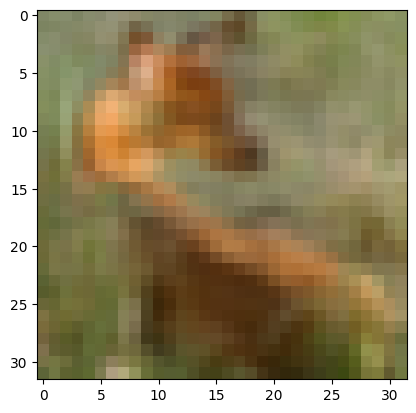

Predicted: bird, Actual: deer


In [57]:
for label, pred, img in zip(labels, predicted, images):
    if label == pred:
        continue
    imshow(img)
    print(f"Predicted: {classes[pred]}, Actual: {classes[label]}")
    break

In [80]:
correct = 0
total = 0
for images, labels in trainloader:
    output = net(images)
    _, predicted = torch.max(output, 1)
    mask = predicted == labels
    correct += mask.sum().item()
    total += mask.size(0)

In [81]:
(correct / total) * 100

49.74

In [82]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 55.5 %
Accuracy for class: car   is 70.0 %
Accuracy for class: bird  is 43.7 %
Accuracy for class: cat   is 38.4 %
Accuracy for class: deer  is 12.5 %
Accuracy for class: dog   is 29.0 %
Accuracy for class: frog  is 73.5 %
Accuracy for class: horse is 36.9 %
Accuracy for class: ship  is 60.1 %
Accuracy for class: truck is 50.6 %


# Trying again with different width

In [ ]:
# define trainload and testload?

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor,
    torchvision.transforms.Normalize(
        (0.5, 0.5, 0.5),
        (0.5, 0.5, 0.5),
    )
])

trainset = torchvision.datasets.CIFAR10(
    "./data",
    train=True,
    transform=
    download=True
)

In [84]:
# import torch.optim
# import torch.functional as F
# import torch.nn as nn
# import torchvision

lr = 0.001

device = "cuda" if torch.cuda.is_available() else "cpu"

# define net
net = Net(width=50)
net.to(device)

# define optimiser
optimiser = optim.SGD(net.parameters(), lr=lr)

# define loss function
loss_function = nn.CrossEntropyLoss()


